In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Building a dataset

Text(0, 0.5, 'Sy')

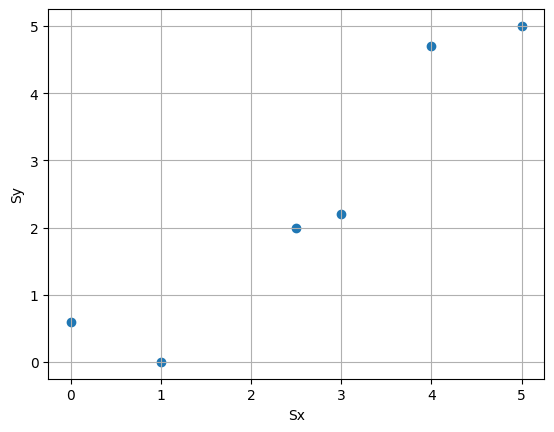

In [ ]:
Sx = np.array([0, 1, 2.5, 3, 4, 5])
Sy = np.array([0.6, 0, 2, 2.2, 4.7, 5])

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

Lets assume a line

$$y = mx + c$$

Where $m$ and $c$ are unknown, which we are trying to find.

We assume a random value for $m$ and $c$ ($m = 2$ and $c = 0$)

In [ ]:
m = tf.Variable(2, dtype=tf.float32)
c = tf.Variable(0, dtype=tf.float32)

def line_fn(x):
    return m*x + c

Text(0, 0.5, 'Sy')

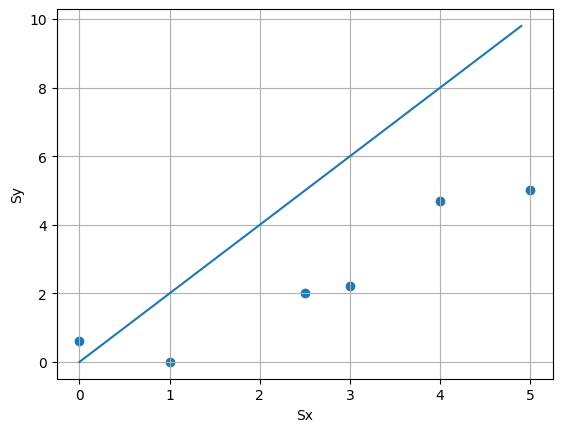

In [ ]:
p = np.arange(0, 5, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

#### Partial derivatives:

$\frac{\partial \;\; loss(l(x), y)}{\partial m} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)x$

$\frac{\partial \;\; loss(l(x), y)}{\partial c} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)$

In [ ]:
# learning rate
lr = 0.01
total_steps = 100

for step in range(total_steps):
    print(f"Step {step+1:2}:")
    print("-"*30)

    with tf.GradientTape() as tape:
        # Printing value of the variables
        print(f"M: {m.numpy():.4f}, C: {c.numpy():.4f}")

        # Stating what variables need to be partially differentiated and calibrated
        tape.watch([m, c])

        # Passing the points to the line function
        pred_y = line_fn(Sx)

        # Calculating the difference/loss of the output (pred_y) of the function
        # w.r.t. the known output (Sy)
        loss = (pred_y - Sy) * (pred_y - Sy)


    # Calculating the gradients w.r.t. the partially diff. parameters
    # and the generated output loss
    grads = tape.gradient(loss, [m, c])

    # Showing the output just for educational purposs
    print(f"M_grad:, {grads[0].numpy():.2f}, C_grad: {grads[1].numpy():.2f}")

    # Updating the gradients
    m = m - lr * grads[0]
    c = c - lr * grads[1]

    print()

Step  1:
------------------------------
M: 2.0000, C: 0.0000
M_grad:, 118.20, C_grad: 33.00

Step  2:
------------------------------
M: 0.8180, C: -0.3300
M_grad:, -27.37, C_grad: -7.60

Step  3:
------------------------------
M: 1.0917, C: -0.2540
M_grad:, 6.33, C_grad: 1.79

Step  4:
------------------------------
M: 1.0284, C: -0.2719
M_grad:, -1.47, C_grad: -0.38

Step  5:
------------------------------
M: 1.0432, C: -0.2681
M_grad:, 0.33, C_grad: 0.12

Step  6:
------------------------------
M: 1.0399, C: -0.2693
M_grad:, -0.09, C_grad: 0.00

Step  7:
------------------------------
M: 1.0407, C: -0.2694
M_grad:, 0.01, C_grad: 0.03

Step  8:
------------------------------
M: 1.0406, C: -0.2697
M_grad:, -0.01, C_grad: 0.02

Step  9:
------------------------------
M: 1.0407, C: -0.2699
M_grad:, -0.01, C_grad: 0.02

Step 10:
------------------------------
M: 1.0408, C: -0.2701
M_grad:, -0.01, C_grad: 0.02

Step 11:
------------------------------
M: 1.0408, C: -0.2703
M_grad:, -0.01, C

## Lets check the final result

Text(0, 0.5, 'Sy')

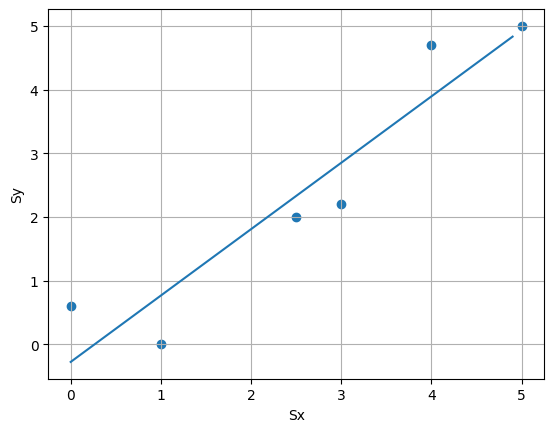

In [ ]:
p = np.arange(0, 5, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

#### How can we get a line that goes through all the points given in the above graph?

We can not achieve this using a single straight line. What if we can combine multiple straight lines?

Lets assume a straight line

$$y = wx + c$$

We can build a polynomial by merging multiple straing lines using the the following equations:

$$
l_0 = \sigma (w_0*x + c_0) \\
l_1 = \sigma (w_1*l_0 + c_1) \\
l_2 = w_2 *l1 + c_2 \\
$$
Here,
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

> $Y =(\sum_{i=0}^n w_i x_i) + b$



In [ ]:
# Reshape into 2D: (6 samples, 1 feature)
Sx = Sx.reshape(-1, 1).astype(np.float32)
Sy = Sy.reshape(-1, 1)

print(Sx.shape,Sy.shape)


W1 = tf.Variable(tf.random.normal([1, 4]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([4]), dtype=tf.float32)

W2 = tf.Variable(tf.random.normal([4, 4]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([4]), dtype=tf.float32)

W3 = tf.Variable(tf.random.normal([4, 1]), dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), dtype=tf.float32)


def mlp(x):
    l0 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
    l1 = tf.nn.sigmoid(tf.matmul(l0, W2) + b2)
    l2 = tf.matmul(l1, W3) + b3

    return l2

(6, 1) (6, 1)


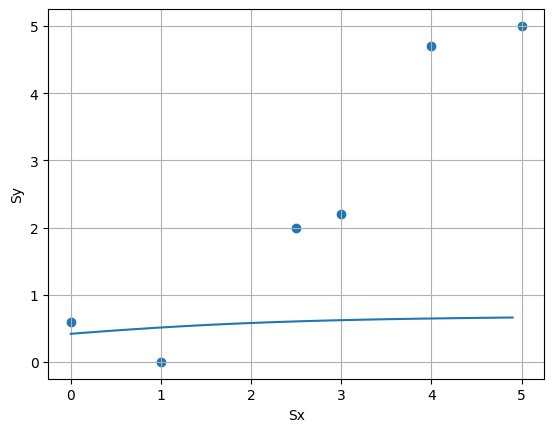

In [ ]:
def plot_line():

    clear_output(wait=True)

    # Generate smooth input values and cast to float32
    p = np.arange(0, 5, 0.1).reshape(-1, 1).astype(np.float32)

    # Predict using the model
    pred = mlp(p)

    # Plot predictions (curve) and training data points
    plt.plot(p, pred.numpy(), label="Model Prediction")
    plt.scatter(Sx, Sy)

    plt.grid(True)
    plt.xlabel('Sx')
    plt.ylabel('Sy')
    plt.show()

plot_line()

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

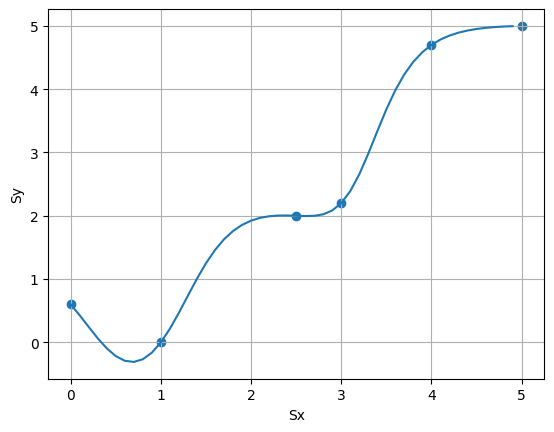

Epoch 30000, Loss: 0.0000


In [ ]:
lr = 0.1
epochs = 30000

# Training loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Predictions
        y_pred = mlp(Sx)
        # Mean Squared Error loss
        loss = tf.reduce_mean((y_pred - Sy) ** 2)

    # Compute gradients w.r.t all weights and biases
    grads = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update weights manually (Gradient Descent)
    W1.assign_sub(lr * grads[0])
    b1.assign_sub(lr * grads[1])
    W2.assign_sub(lr * grads[2])
    b2.assign_sub(lr * grads[3])
    W3.assign_sub(lr * grads[4])
    b3.assign_sub(lr * grads[5])

    if (epoch+1) % 1000 == 0:
        plot_line()
        print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")



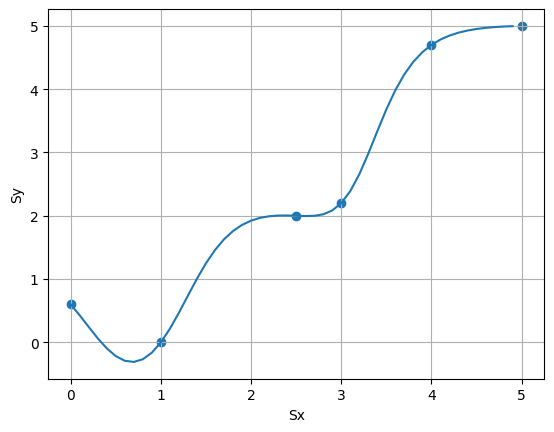

In [ ]:
plot_line()

In [ ]:
line_fn(3.85)

<tf.Tensor: shape=(), dtype=float32, numpy=313.3692932128906>

In [ ]:

# Example input (batch of 4 samples, each sample = sequence of length 10, feature size 8)
sample_input = tf.random.normal((4, 10, 8))

print("=== Dense Layer ===")
dense = tf.keras.layers.Dense(16, activation='relu')
print(dense(sample_input).shape)   # (4, 10, 16) → applied on last dim

print("\n=== Simple RNN Layer ===")
rnn = tf.keras.layers.SimpleRNN(32)
print(rnn(sample_input).shape)     # (4, 32) → returns last output by default

print("\n=== LSTM Layer ===")
lstm = tf.keras.layers.LSTM(32)
print(lstm(sample_input).shape)    # (4, 32)

print("\n=== GRU Layer ===")
gru = tf.keras.layers.GRU(32)
print(gru(sample_input).shape)     # (4, 32)

print("\n=== Bidirectional RNN ===")
bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))
print(bi_lstm(sample_input).shape) # (4, 64) → doubled (forward + backward)

# Example input for CNN (batch=4, image=28x28, channels=1)
image_input = tf.random.normal((4, 28, 28, 1))

print("\n=== Convolution Layer ===")
conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu')
print(conv(image_input).shape)     # (4, 26, 26, 32)

print("\n=== MaxPooling Layer ===")
pool = tf.keras.layers.MaxPooling2D((2,2))
print(pool(conv(image_input)).shape)  # (4, 13, 13, 32)

print("\n=== Batch Normalization ===")
bn = tf.keras.layers.BatchNormalization()
print(bn(conv(image_input)).shape) # (4, 26, 26, 32)

=== Dense Layer ===
(4, 10, 16)

=== Simple RNN Layer ===
(4, 32)

=== LSTM Layer ===
(4, 32)

=== GRU Layer ===
(4, 32)

=== Bidirectional RNN ===
(4, 64)

=== Convolution Layer ===
(4, 26, 26, 32)

=== MaxPooling Layer ===
(4, 13, 13, 32)

=== Batch Normalization ===
(4, 26, 26, 32)


#Basic classification

##Loading the Dataset

In [ ]:


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_labels[0]

array([6], dtype=uint8)

The classes are:

Label	Description
- 0	: airplane
- 1	: automobile
- 2	: bird
- 3	: cat
- 4	: deer
- 5	: dog
- 6	: frog
- 7	: horse
- 8	" ship
- 9	: truck

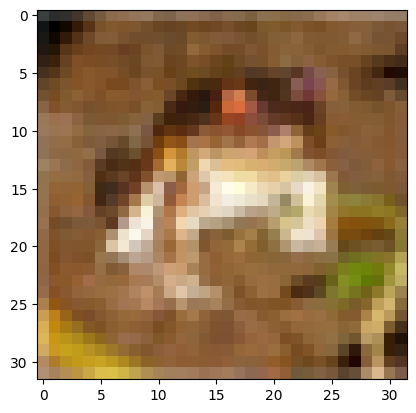

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.show()

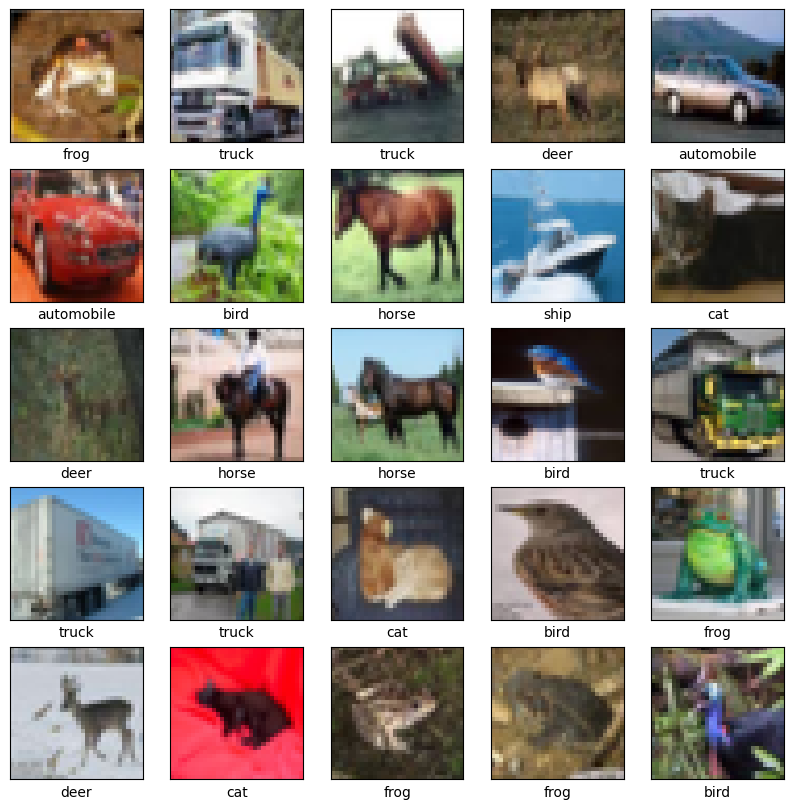

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Normalize pixel values to 0–1
train_images= train_images / 255.0
test_images = test_images / 255.0


# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# # Resize images (example: resize to 64x64)
# train_images = tf.image.resize(train_images, [64, 64])
# test_images = tf.image.resize(test_images, [64, 64])

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


Now Building the model


There are basically two ways to build a model

- Sequaltial
-Functional API

In [ ]:
  model0 = tf.keras.models.Sequential()

  model0.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
  model0.add(tf.keras.layers.Dense(128, activation='relu'))
  model0.add(tf.keras.layers.Dense(64, activation='relu'))
  model0.add(tf.keras.layers.Dense(10, activation='softmax'))



  model1 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model0.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
input = tf.keras.layers.Input(shape=(32, 32, 3))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),strides=1,padding='same')(input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),strides=1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x) #softmax for prediction

model = tf.keras.Model(inputs=input, outputs=output)

model.summary()



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,218 (1.64 MB)

 Trainable params: 430,026 (1.64 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),#'adam"
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),]
              #  tf.keras.metrics.F1Score(),
              #  tf.keras.metrics.Precision(),
              #  tf.keras.metrics.Recall()],

)

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['categorical_accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - categorical_accuracy: 0.3396 - loss: 1.7966 - val_categorical_accuracy: 0.3571 - val_loss: 1.7957
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.4820 - loss: 1.4425 - val_categorical_accuracy: 0.4699 - val_loss: 1.4596
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.5202 - loss: 1.3517 - val_categorical_accuracy: 0.4687 - val_loss: 1.5375
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5455 - loss: 1.2746 - val_categorical_accuracy: 0.5258 - val_loss: 1.3590
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.5667 - loss: 1.2203 - val_categorical_accuracy: 0.4937 - val_loss: 1.4211
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5785 - loss: 1.1857 - val_categorical_accuracy: 0.4856 - val_loss: 1.4858
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.56      0.56      0.56      1000
  automobile       0.65      0.59      0.62      1000
        bird       0.47      0.41      0.44      1000
         cat       0.40      0.41      0.40      1000
        deer       0.44      0.61      0.51      1000
         dog       0.51      0.40      0.45      1000
        frog       0.68      0.54      0.61      1000
       horse       0.60      0.55      0.58      1000
        ship       0.52      0.69      0.59      1000
       truck       0.60      0.60      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.54      0.53     10000



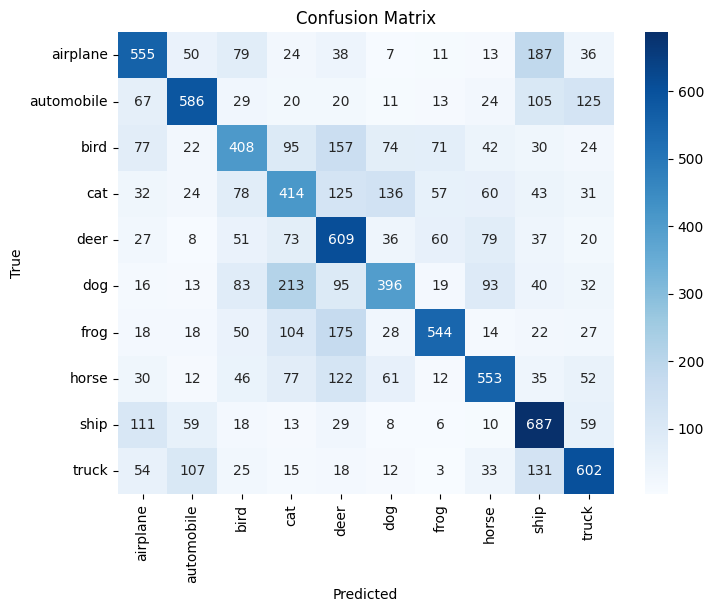

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np



y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)


print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# 3️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


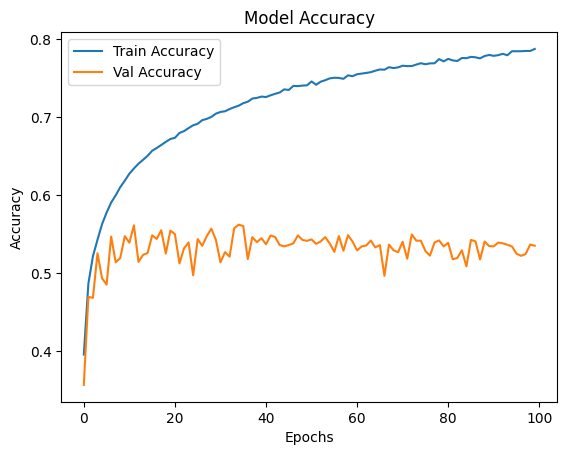

In [ ]:
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

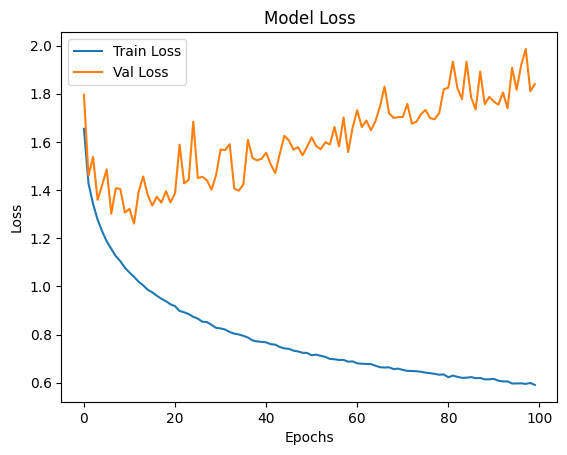

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
], name="data_augmentation")


# Input layer
inputs = tf.keras.layers.Input(shape=(32,32,3))

# Apply augmentation first
x = data_augmentation(inputs) #image should not be normalized first

# Normalize images
x = tf.keras.layers.Rescaling(1./255)(x)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),strides=2)(input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),strides=2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input, outputs=output)

model.summary()

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),#'adam"
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy(),]
)


history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,002 (144.54 KB)

 Trainable params: 36,810 (143.79 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - categorical_accuracy: 0.2743 - loss: 1.9606 - val_categorical_accuracy: 0.3521 - val_loss: 1.7971
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.4055 - loss: 1.6436 - val_categorical_accuracy: 0.3826 - val_loss: 1.6883
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.4402 - loss: 1.5551 - val_categorical_accuracy: 0.4197 - val_loss: 1.6108
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - categorical_accuracy: 0.4689 - loss: 1.4974 - val_categorical_accuracy: 0.4792 - val_loss: 1.4937
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.4792 - loss: 1.4666 - val_categorical_accuracy: 0.5011 - val_loss: 1.4077
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - categorical_accuracy: 0.4879 - loss: 1.4290 - val_categorical_accuracy: 0.4980 - val_loss: 1.4241
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical

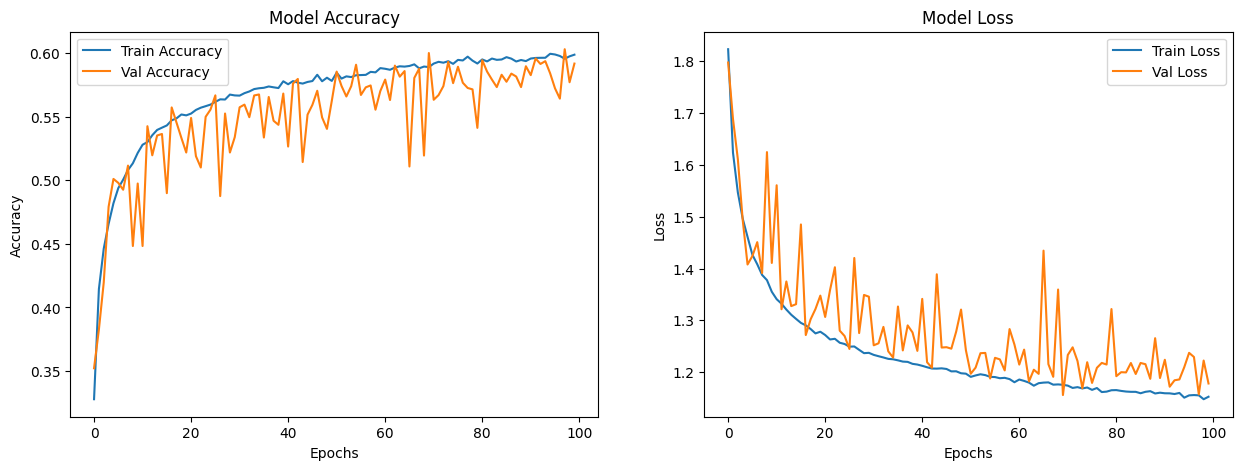

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.56      0.74      0.63      1000
  automobile       0.67      0.71      0.69      1000
        bird       0.46      0.56      0.50      1000
         cat       0.49      0.38      0.43      1000
        deer       0.51      0.60      0.55      1000
         dog       0.60      0.46      0.52      1000
        frog       0.77      0.59      0.67      1000
       horse       0.65      0.61      0.63      1000
        ship       0.61      0.64      0.63      1000
       truck       0.69      0.62      0.65      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000



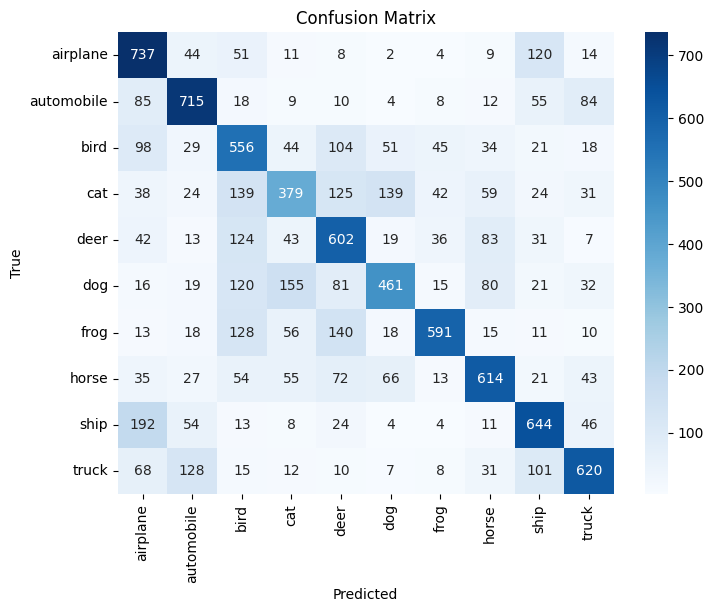

In [ ]:
plt.figure(figsize=(15, 5))

#accuracy
plt.subplot(1,2,1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification Report
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# 3️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Key Architectures
Here’s how to differentiate the most prominent ones:

- AlexNet (2012):

    First big breakthrough CNN.

    8 layers, simple architecture.

    Introduced ReLU & dropout.

    Much better accuracy than traditional ML.

- VGG (2014):

    Very deep, up to 19 layers.

    Uses small 3×3 filters stacked together.

    Easy to understand but huge in parameters.

- ResNet (2015):

    Introduced skip connections (residual learning).

    Allows training of extremely deep networks (50, 101, 152 layers).

    Solved the problem of vanishing gradients.

- Inception (GoogLeNet):

    Uses parallel filters of different sizes (1×1, 3×3, 5×5).

    Efficient, fewer parameters than VGG.

    Introduced “Inception modules.”

- DenseNet (2017):

    Every layer is connected to every other layer.

    Reuses features → fewer parameters & better gradient flow.

- Xception (2017):

    Extension of Inception.

    Replaces standard convolutions with depthwise separable convolutions (faster, more efficient).

In [ ]:

# Load pre-trained ResNet50 without top layer
base_model = tf.keras.applications.ResNet50(
    # weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

inputs = tf.keras.Input(shape=(32, 32, 3))
# Removed preprocess_input as images are already scaled
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Changed loss function
              metrics=['accuracy'])

model.summary()

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 23,798,154 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

NameError: name 'train_images' is not defined

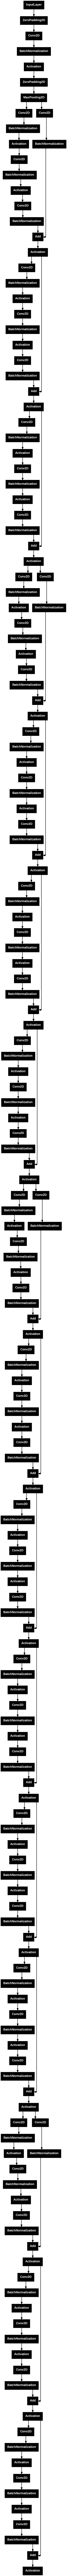

In [ ]:
# Load pre-trained ResNet50 without top layer
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)


base_model.trainable = True

# Let's say we unfreeze from layer -20 onwards
for layer in base_model.layers[:-20]:
    layer.trainable = False



inputs = tf.keras.Input(shape=(32, 32, 3))
# Removed preprocess_input as images are already scaled
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), #small lr
              loss='categorical_crossentropy', # Changed loss function
              metrics=['accuracy'])

model.summary()
base_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 9,194,890 (35.08 MB)

 Non-trainable params: 14,656,384 (55.91 MB)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 8,931,328 (34.07 MB)

 Non-trainable params: 14,656,384 (55.91 MB)